<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import datetime as dt
import seaborn as sns

In [2]:
Base=pd.read_csv('/content/netflix daily top 10.csv')

**Base de Dados**

In [3]:
Base

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [4]:
Base.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

Convertendo a coluna 'As of' de object para data

In [5]:
Base['As of'] = pd.to_datetime(Base['As of'])

In [6]:
Base.dtypes

As of                   datetime64[ns]
Rank                             int64
Year to Date Rank               object
Last Week Rank                  object
Title                           object
Type                            object
Netflix Exclusive               object
Netflix Release Date            object
Days In Top 10                   int64
Viewership Score                 int64
dtype: object

Período de ánalise

In [9]:
inicio=pd.to_datetime(Base['As of']).dt.date.min()
print(inicio)

2020-04-01


In [11]:
final=pd.to_datetime(Base['As of']).dt.date.max()
print(final)

2022-03-11


Verificando valores nulos

In [12]:
Base.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

Análise valores nulos

In [13]:
Base['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

Converter os valores NaN para Not

In [15]:
Base['Netflix Exclusive'] = Base['Netflix Exclusive'].fillna("Not")

In [16]:
Base['Netflix Exclusive'].value_counts()

Yes    4599
Not    2501
Name: Netflix Exclusive, dtype: int64

**Estatística**

In [18]:
Base.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


Gráfico BoxPlot

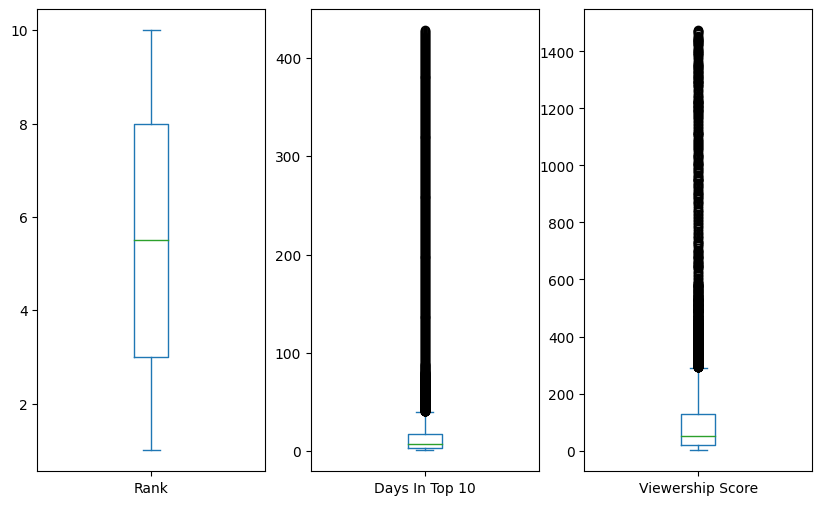

In [20]:
Base.plot(kind='box',figsize=(10,6),subplots=True);

Análise Outliers

In [21]:
Base[Base['Days In Top 10']>=100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,Not,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,Not,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,Not,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,Not,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,Not,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,Not,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,Not,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,Not,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,Not,"Jun 1, 2020",427,1472


In [22]:
Base.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

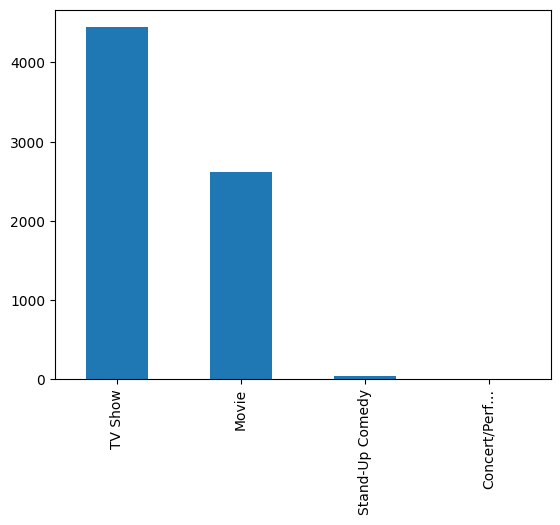

In [25]:
Base.Type.value_counts().plot(kind='bar');